#TEST Records

In [1]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Test_df=pd.read_csv(r"C:\Users\anura\OneDrive\Desktop\webscrapping\Project\scraped_data.csv") 
Test_df

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,100,50,0,Unnamed: 11
0,SR Tendulkar (IND),1989-2013,200,329,33,15921,248*,53.78,51,68,14,NaN
1,JE Root (ENG),2012-2025,158,288,24,13543,262,51.29,39,66,13,NaN
2,RT Ponting (AUS),1995-2012,168,287,29,13378,257,51.85,41,62,17,NaN
3,JH Kallis (ICC/SA),1995-2013,166,280,40,13289,224,55.37,45,58,16,NaN
4,R Dravid (ICC/IND),1996-2012,164,286,32,13288,270,52.31,36,63,8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3195,Mukesh Kumar (IND),2023-2024,3,4,3,0,0*,0.00,0,0,1,NaN
3196,Nadeem Ghauri (PAK),1990-1990,1,1,0,0,0,0.00,0,0,1,NaN
3197,M Ngam (SA),2000-2001,3,1,1,0,0*,-,0,0,0,NaN
3198,RL Park (AUS),1920-1921,1,1,0,0,0,0.00,0,0,1,NaN


In [3]:
#dropped empty column
Test_df.drop(columns="Unnamed: 11",inplace=True)
Test_df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,100,50,0
0,SR Tendulkar (IND),1989-2013,200,329,33,15921,248*,53.78,51,68,14
1,JE Root (ENG),2012-2025,158,288,24,13543,262,51.29,39,66,13
2,RT Ponting (AUS),1995-2012,168,287,29,13378,257,51.85,41,62,17
3,JH Kallis (ICC/SA),1995-2013,166,280,40,13289,224,55.37,45,58,16
4,R Dravid (ICC/IND),1996-2012,164,286,32,13288,270,52.31,36,63,8


In [4]:
Test_df.columns

Index(['Player', 'Span', 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', '100', '50',
       '0'],
      dtype='object')

In [5]:
#changed column names
Test_df = Test_df.rename(columns={
    "Player": "Player_Name",
    "Mat": "Matches",
    "Inns": "Innings",
    "Runs": "Total_Runs",
    "Ave": "Batting_Average",
    "SR": "Strike_Rate",
    "NO":"Not_Out",
    "HS":"Highest_Score",
    "BF":"Ball_Faced",
    "100":"100's",
    "50":"50's"
})
Test_df.head()

,Player_Name,Span,Matches,Innings,Not_Out,Total_Runs,Highest_Score,Batting_Average,100's,50's,0
0,SR Tendulkar (IND),1989-2013,200,329,33,15921,248*,53.78,51,68,14
1,JE Root (ENG),2012-2025,158,288,24,13543,262,51.29,39,66,13
2,RT Ponting (AUS),1995-2012,168,287,29,13378,257,51.85,41,62,17
3,JH Kallis (ICC/SA),1995-2013,166,280,40,13289,224,55.37,45,58,16
4,R Dravid (ICC/IND),1996-2012,164,286,32,13288,270,52.31,36,63,8


In [6]:
#seperated names and Country(Region)
Test_df[['Player_Names','Country(Region)']] = Test_df['Player_Name'].str.rsplit('(',n=1,expand = True)
Test_df['Country(Region)']=Test_df['Country(Region)'].str.replace(")","")

#dropped previous column 
Test_df.drop(columns = "Player_Name",inplace = True)
#arranged columns
cols = ['Player_Names', 'Country(Region)'] + [c for c in Test_df.columns if c not in ['Player_Names', 'Country(Region)']]
Test_df = Test_df[cols]
Test_df.head()


,Player_Names,Country(Region),Span,Matches,Innings,Not_Out,Total_Runs,Highest_Score,Batting_Average,100's,50's,0
0,SR Tendulkar,IND,1989-2013,200,329,33,15921,248*,53.78,51,68,14
1,JE Root,ENG,2012-2025,158,288,24,13543,262,51.29,39,66,13
2,RT Ponting,AUS,1995-2012,168,287,29,13378,257,51.85,41,62,17
3,JH Kallis,ICC/SA,1995-2013,166,280,40,13289,224,55.37,45,58,16
4,R Dravid,ICC/IND,1996-2012,164,286,32,13288,270,52.31,36,63,8


In [7]:
#removed region names 
Test_df["Country(Region)"] = Test_df["Country(Region)"].str.replace(r"(Asia|Afr|ICC)/", "", regex=True)

#replaced country acronyms with full name
replace_dict = {
    "IND": "India",
    "AUS": "Australia",
    "SL": "Sri Lanka",
    "PAK": "Pakistan",
    "SA": "South Africa",
    "WI": "West Indies",
    "NZ": "New Zealand",
    "BAN": "Bangladesh",
    "ENG": "England",
    "IRE": "Ireland",
    "ZIM": "Zimbabwe",
    "AFG": "Afghanistan",
    "SCOT": "Scotland",
    "KENYA": "Kenya",
    "USA": "United States",
    "NAM": "Namibia",
    "NED": "Netherlands",
    "PNG": "Papua New Guinea",
    "CAN": "Canada",
    "UAE": "United Arab Emirates",
    "NEP": "Nepal",
    "OMA": "Oman",
    "AUS/ICC":"Australia",
    "ENG/ICC":"England",
    "AUS/SA":"Australia/South Africa",
    "AUS/NZ":"Australia/New Zealand",
    'ENG/IRE':'England/Ireland'
}

Test_df["Country(Region)"] = Test_df["Country(Region)"].replace(replace_dict)

#renamed column to country
Test_df = Test_df.rename(columns = {'Country(Region)':'Country'})

#removed players who played for two or more countries
Test_df = Test_df[~Test_df['Country'].str.contains('/')].reset_index(drop=True)

Test_df.head()

,Player_Names,Country,Span,Matches,Innings,Not_Out,Total_Runs,Highest_Score,Batting_Average,100's,50's,0
0,SR Tendulkar,India,1989-2013,200,329,33,15921,248*,53.78,51,68,14
1,JE Root,England,2012-2025,158,288,24,13543,262,51.29,39,66,13
2,RT Ponting,Australia,1995-2012,168,287,29,13378,257,51.85,41,62,17
3,JH Kallis,South Africa,1995-2013,166,280,40,13289,224,55.37,45,58,16
4,R Dravid,India,1996-2012,164,286,32,13288,270,52.31,36,63,8


In [8]:
#seperated the year span into stat and end year
Test_df[['Start_Year', 'End_Year']] = Test_df['Span'].str.split('-', expand=True)
#arranged columns
cols = ['Player_Names', 'Country','Start_Year', 'End_Year'] + [c for c in Test_df.columns[3:] if c not in ['Start_Year', 'End_Year']]
Test_df= Test_df[cols]
Test_df.head()

,Player_Names,Country,Start_Year,End_Year,Matches,Innings,Not_Out,Total_Runs,Highest_Score,Batting_Average,100's,50's,0
0,SR Tendulkar,India,1989,2013,200,329,33,15921,248*,53.78,51,68,14
1,JE Root,England,2012,2025,158,288,24,13543,262,51.29,39,66,13
2,RT Ponting,Australia,1995,2012,168,287,29,13378,257,51.85,41,62,17
3,JH Kallis,South Africa,1995,2013,166,280,40,13289,224,55.37,45,58,16
4,R Dravid,India,1996,2012,164,286,32,13288,270,52.31,36,63,8


In [9]:
# Ensure Start_Year and End_Year are datetime
Test_df['Start_Year'] = pd.to_datetime(Test_df['Start_Year'], errors='coerce')
Test_df['End_Year'] = pd.to_datetime(Test_df['End_Year'], errors='coerce')

# Now extract only the year
Test_df['Start_Year'] = Test_df['Start_Year'].dt.year
Test_df['End_Year'] = Test_df['End_Year'].dt.year

print(Test_df[['Start_Year', 'End_Year']].head())
print(Test_df[['Start_Year', 'End_Year']].dtypes)



   Start_Year  End_Year
0        1989      2013
1        2012      2025
2        1995      2012
3        1995      2013
4        1996      2012
Start_Year    int32
End_Year      int32
dtype: object


In [10]:
#added columns for career span
Test_df['Career_Span'] = Test_df['End_Year'] - Test_df['Start_Year']
Test_df.head()

,Player_Names,Country,Start_Year,End_Year,Matches,Innings,Not_Out,Total_Runs,Highest_Score,Batting_Average,100's,50's,0,Career_Span
0,SR Tendulkar,India,1989,2013,200,329,33,15921,248*,53.78,51,68,14,24
1,JE Root,England,2012,2025,158,288,24,13543,262,51.29,39,66,13,13
2,RT Ponting,Australia,1995,2012,168,287,29,13378,257,51.85,41,62,17,17
3,JH Kallis,South Africa,1995,2013,166,280,40,13289,224,55.37,45,58,16,18
4,R Dravid,India,1996,2012,164,286,32,13288,270,52.31,36,63,8,16


In [11]:
#set int/float datatypes to columns
num_cols = ["Not_Out","Matches", "Innings", "Total_Runs", "100's", "50's", "0"]
Test_df[num_cols] = Test_df[num_cols].apply(pd.to_numeric, errors="coerce").astype("Int64")
Test_df["Batting_Average"] = pd.to_numeric(Test_df["Batting_Average"], errors="coerce").astype(float)

#new numeric column for highest score ->HS_num
Test_df['HS_num']=Test_df['Highest_Score'].str.replace("*","").astype("Int64")
Test_df.head()

,Player_Names,Country,Start_Year,End_Year,Matches,Innings,Not_Out,Total_Runs,Highest_Score,Batting_Average,100's,50's,0,Career_Span,HS_num
0,SR Tendulkar,India,1989,2013,200,329,33,15921,248*,53.78,51,68,14,24,248
1,JE Root,England,2012,2025,158,288,24,13543,262,51.29,39,66,13,13,262
2,RT Ponting,Australia,1995,2012,168,287,29,13378,257,51.85,41,62,17,17,257
3,JH Kallis,South Africa,1995,2013,166,280,40,13289,224,55.37,45,58,16,18,224
4,R Dravid,India,1996,2012,164,286,32,13288,270,52.31,36,63,8,16,270


In [12]:
#distict values
Test_df['Country'].value_counts()

Country
England         699
Australia       458
South Africa    365
West Indies     340
India           307
New Zealand     285
Pakistan        252
Sri Lanka       170
Zimbabwe        134
Bangladesh      107
Afghanistan      39
Ireland          27
Name: count, dtype: int64

In [13]:
Test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3183 entries, 0 to 3182
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Player_Names     3183 non-null   object 
 1   Country          3183 non-null   object 
 2   Start_Year       3183 non-null   int32  
 3   End_Year         3183 non-null   int32  
 4   Matches          3183 non-null   Int64  
 5   Innings          3183 non-null   Int64  
 6   Not_Out          3183 non-null   Int64  
 7   Total_Runs       3183 non-null   Int64  
 8   Highest_Score    3183 non-null   object 
 9   Batting_Average  3118 non-null   float64
 10  100's            3183 non-null   Int64  
 11  50's             3183 non-null   Int64  
 12  0                3183 non-null   Int64  
 13  Career_Span      3183 non-null   int32  
 14  HS_num           3183 non-null   Int64  
dtypes: Int64(8), float64(1), int32(3), object(3)
memory usage: 360.7+ KB


In [14]:
#filled Nan values with zero
Test_df['Batting_Average'] = Test_df['Batting_Average'].fillna(0)
Test_df[Test_df['Batting_Average'].isnull()].head()

,Player_Names,Country,Start_Year,End_Year,Matches,Innings,Not_Out,Total_Runs,Highest_Score,Batting_Average,100's,50's,0,Career_Span,HS_num


In [15]:
Test_df['Batting_Average'].isnull().sum()

np.int64(0)

UNIVARIATE ANALYSIS

In [16]:
print("Summary Statistics:\n", Test_df.describe())

Summary Statistics:
         Start_Year     End_Year    Matches    Innings   Not_Out   Total_Runs  \
count  3183.000000  3183.000000     3183.0     3183.0    3183.0       3183.0   
mean   1972.767515  1977.393340  17.924914  29.029846  3.744581   762.271442   
std      39.597186    39.670174  25.697969  42.020072  6.509611  1591.206005   
min    1877.000000  1877.000000        1.0        1.0       0.0          0.0   
25%    1948.000000  1952.000000        3.0        4.0       0.0         38.0   
50%    1982.000000  1987.000000        7.0       12.0       1.0        163.0   
75%    2005.000000  2010.000000       21.0       34.0       5.0        682.5   
max    2025.000000  2025.000000      200.0      329.0     114.0      15921.0   

       Batting_Average     100's      50's         0  Career_Span     HS_num  
count      3183.000000    3183.0    3183.0    3183.0  3183.000000     3183.0  
mean         20.052256  1.433239  3.486019  3.143261     4.625825  69.708137  
std          14.26776

Country
England         699
Australia       458
South Africa    365
West Indies     340
India           307
New Zealand     285
Pakistan        252
Sri Lanka       170
Zimbabwe        134
Bangladesh      107
Afghanistan      39
Ireland          27
Name: count, dtype: int64


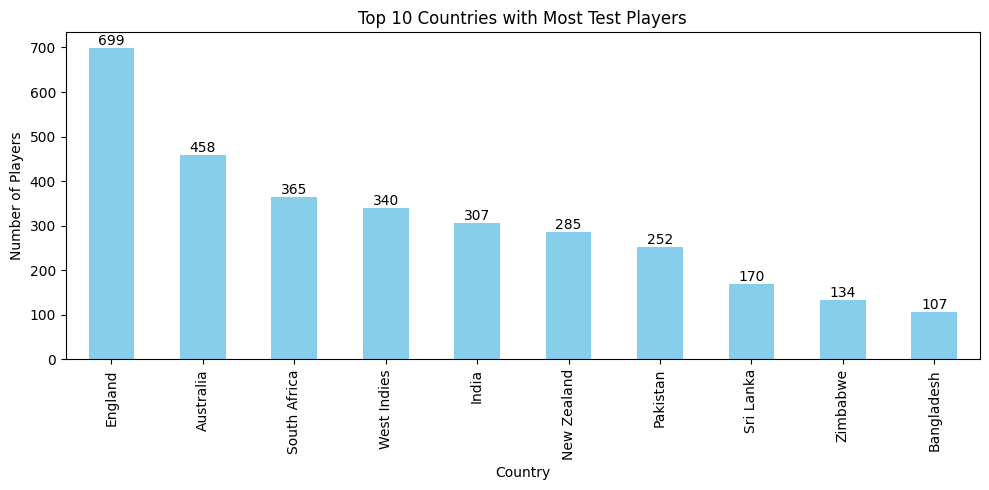

In [17]:
#Which countries have produced the most test players
print(Test_df['Country'].value_counts())

plt.figure(figsize=(10,5)) 
ax = Test_df['Country'].value_counts().head(10).plot(kind='bar', color='skyblue')

plt.title("Top 10 Countries with Most Test Players")
plt.xlabel("Country")
plt.ylabel("Number of Players")

# ✅ Add data labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.savefig("Top 10 Countries with Most Test Players.png")

plt.show()


C:\Users\anura\AppData\Local\Temp\ipykernel_13024\3926252007.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Player_Names', y='Total_Runs', data=top10_runs, palette='viridis')


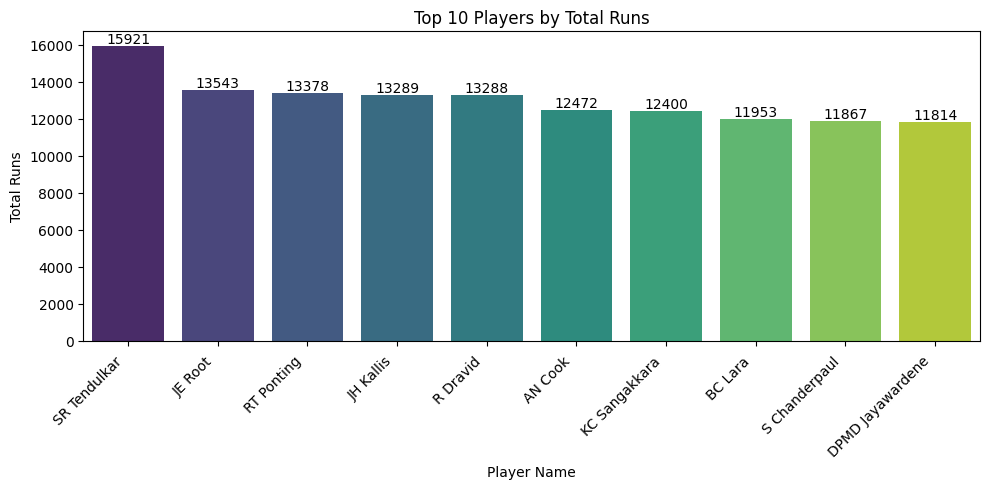

In [18]:
#top 10 run scorers
#  Top 10 players by Total Runs 
top10_runs = Test_df.sort_values(by='Total_Runs', ascending=False).head(10)

plt.figure(figsize=(10,5))
ax = sns.barplot(x='Player_Names', y='Total_Runs', data=top10_runs, palette='viridis')

plt.title("Top 10 Players by Total Runs")
plt.xlabel("Player Name")
plt.ylabel("Total Runs")
plt.xticks(rotation=45, ha='right')

#  Add data labels on each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.savefig('Top 10 players by Total Runs.png')
plt.show()


📊 Summary Statistics for Highest Score (HS_num):

count       3183.0
mean     69.708137
std      67.336841
min            0.0
25%           19.0
50%           47.0
75%          102.0
max          400.0
Name: HS_num, dtype: Float64


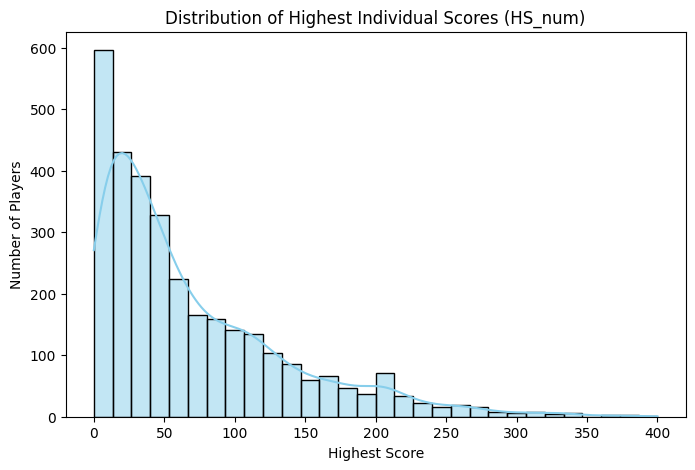

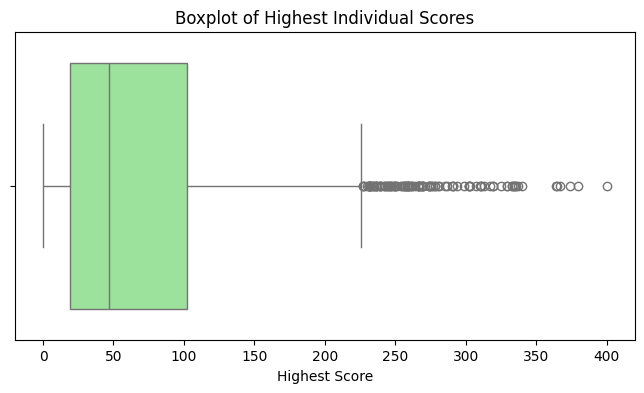

C:\Users\anura\AppData\Local\Temp\ipykernel_13024\882855494.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Player_Names', y='HS_num', data=top10_HS, palette='viridis')


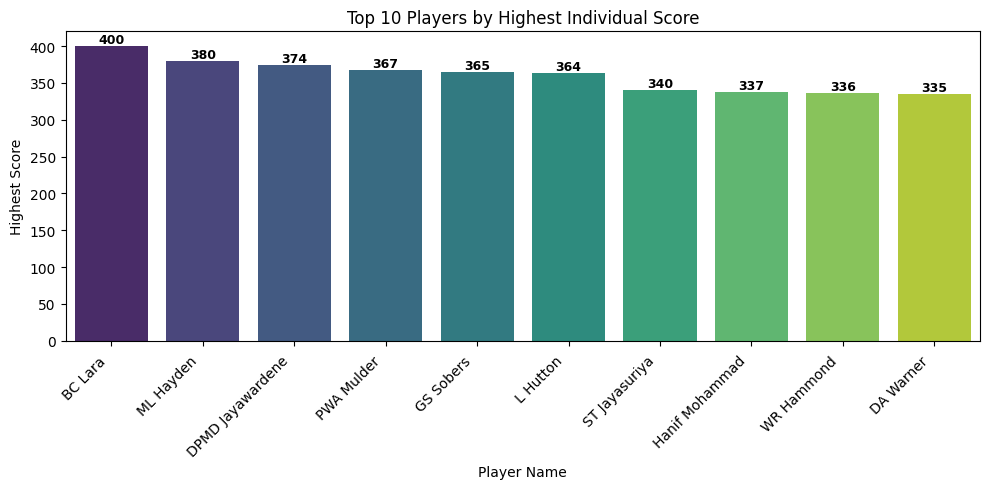

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print("📊 Summary Statistics for Highest Score (HS_num):\n")
print(Test_df['HS_num'].describe())

# Histogram — Distribution of highest scores
plt.figure(figsize=(8,5))
sns.histplot(Test_df['HS_num'], bins=30, color='skyblue', edgecolor='black', kde=True)
plt.title("Distribution of Highest Individual Scores (HS_num)")
plt.xlabel("Highest Score")
plt.ylabel("Number of Players")
plt.show()

# Boxplot — To detect outliers
plt.figure(figsize=(8,4))
sns.boxplot(x=Test_df['HS_num'], color='lightgreen')
plt.title("Boxplot of Highest Individual Scores")
plt.xlabel("Highest Score")
plt.savefig("Boxplot of Highest Individual Scores.png")
plt.show()

# Top 10 players by highest score
top10_HS = Test_df.sort_values(by='HS_num', ascending=False).head(10)

plt.figure(figsize=(10,5))
ax = sns.barplot(x='Player_Names', y='HS_num', data=top10_HS, palette='viridis')
plt.title("Top 10 Players by Highest Individual Score")
plt.xlabel("Player Name")
plt.ylabel("Highest Score")
plt.xticks(rotation=45, ha='right')

# ✅ Add data labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=9, color='black', fontweight='bold')

plt.tight_layout()
plt.savefig("Top 10 Players by Highest Individual Score.png")
plt.show()


In [20]:
# # Boxplot of Batting Average
# plt.figure(figsize=(8,5))
# sns.boxplot(x=qualified_df['Batting_Average'], color='orange')
# plt.title("Distribution of Batting Averages")
# plt.show()

C:\Users\anura\AppData\Local\Temp\ipykernel_13024\1068811097.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Player_Names', y='Batting_Average', data=top10_avg, palette='mako')


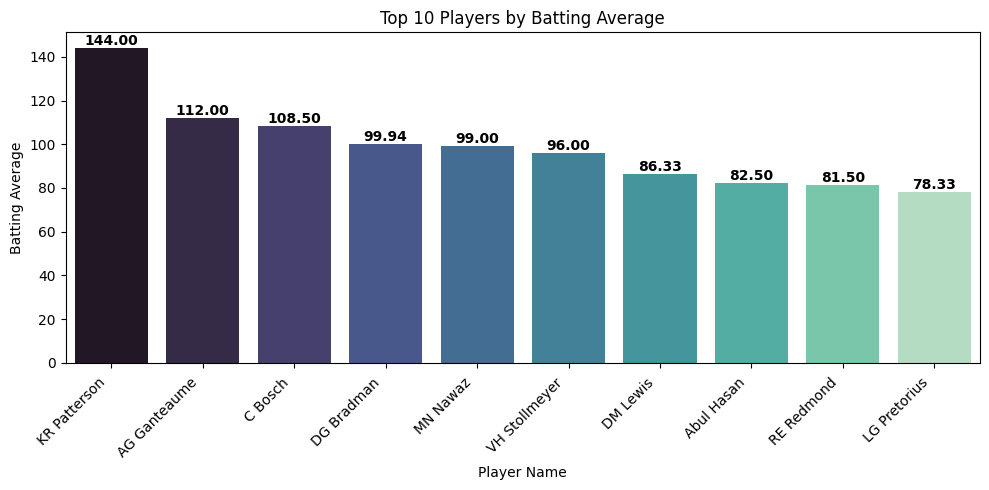

In [21]:
#  Top 10 Players by Batting Average
top10_avg = Test_df.sort_values(by='Batting_Average', ascending=False).head(10)

plt.figure(figsize=(10,5))
ax = sns.barplot(x='Player_Names', y='Batting_Average', data=top10_avg, palette='mako')

plt.title("Top 10 Players by Batting Average")
plt.xlabel("Player Name")
plt.ylabel("Batting Average")
plt.xticks(rotation=45, ha='right')

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

plt.tight_layout()
plt.savefig("Top 10 Players by Batting Average.png")
plt.show()


C:\Users\anura\AppData\Local\Temp\ipykernel_13024\3169048865.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Player_Names', y='Batting_Average', data=top10_avg, palette='mako')


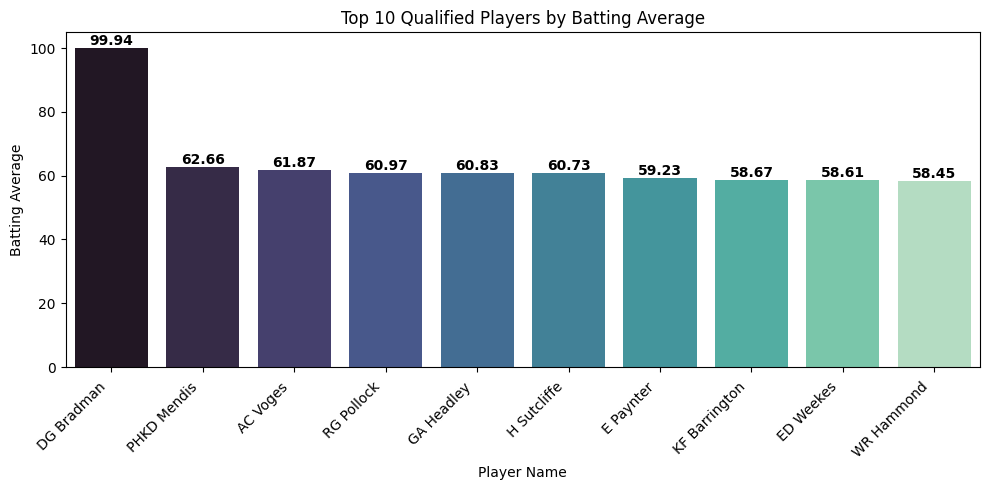

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set qualification criteria (change as per your dataset)
qualified_df = Test_df[Test_df['Innings'] >= 20]  # or use 'Matches' >= 10

# Sort by batting average and pick top 10
top10_avg = qualified_df.sort_values(by='Batting_Average', ascending=False).head(10)

# Plot
plt.figure(figsize=(10,5))
ax = sns.barplot(x='Player_Names', y='Batting_Average', data=top10_avg, palette='mako')

plt.title("Top 10 Qualified Players by Batting Average")
plt.xlabel("Player Name")
plt.ylabel("Batting Average")
plt.xticks(rotation=45, ha='right')

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

plt.tight_layout()
plt.savefig("Top 10 Qualified Players by Batting Average.png")
plt.show()


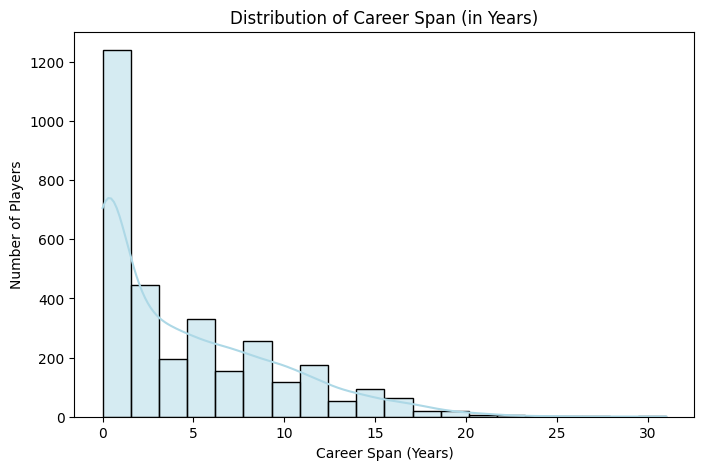

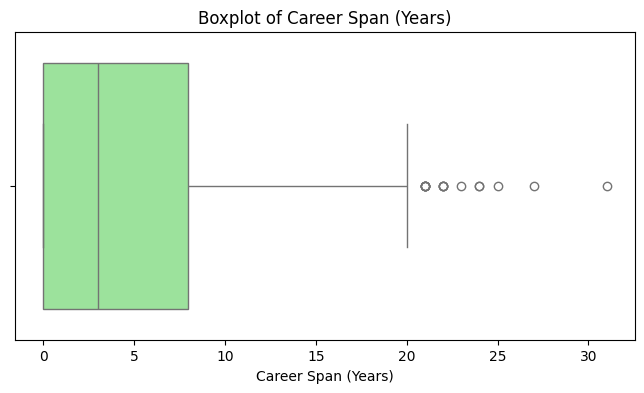

C:\Users\anura\AppData\Local\Temp\ipykernel_13024\3411728729.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Player_Names', y='Career_Span', data=top10_span, palette='crest')


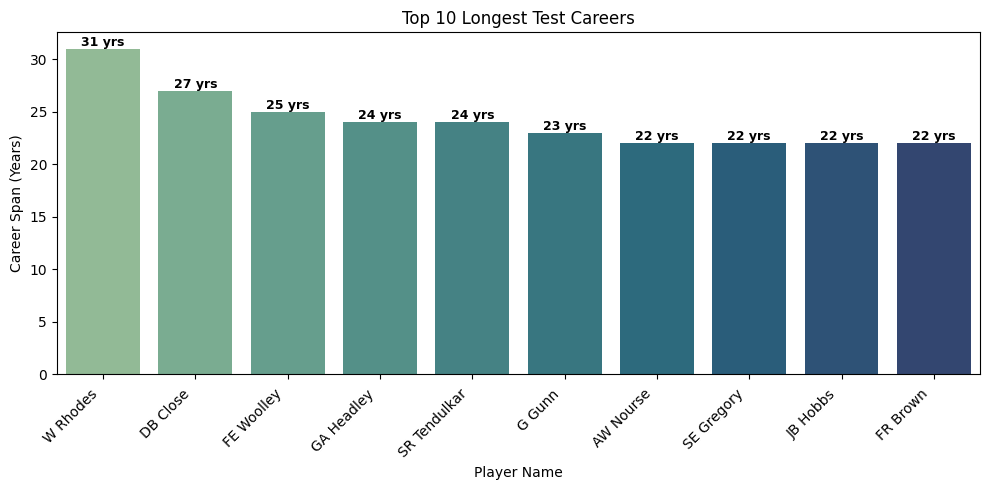

In [23]:


# Histogram
plt.figure(figsize=(8,5))
sns.histplot(Test_df['Career_Span'], bins=20, color='lightblue', edgecolor='black', kde=True)
plt.title("Distribution of Career Span (in Years)")
plt.xlabel("Career Span (Years)")
plt.ylabel("Number of Players")
plt.savefig("Distribution of Career Span (in Years).png")
plt.show()

# Boxplot — detect long-career outliers
plt.figure(figsize=(8,4))
sns.boxplot(x=Test_df['Career_Span'], color='lightgreen')
plt.title("Boxplot of Career Span (Years)")
plt.xlabel("Career Span (Years)")
plt.savefig("Boxplot of Career Span (Years).png")
plt.show()

# Top 10 longest careers
top10_span = Test_df.sort_values(by='Career_Span', ascending=False).head(10)

plt.figure(figsize=(10,5))
ax = sns.barplot(x='Player_Names', y='Career_Span', data=top10_span, palette='crest')
plt.title("Top 10 Longest Test Careers")
plt.xlabel("Player Name")
plt.ylabel("Career Span (Years)")
plt.xticks(rotation=45, ha='right')

# Add data labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())} yrs',
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom', fontsize=9, color='black', fontweight='bold')

plt.tight_layout()
plt.savefig("Top 10 Longest Test Careers.png")
plt.show()


In [24]:
# # Keep only rows where 'Country' does NOT contain '/'
# Test_df = Test_df[~Test_df['Country'].str.contains('/')].reset_index(drop=True)

# # Verify
# print(Test_df['Country'].unique())
# print(f"\n✅ Cleaned dataset shape: {Test_df.shape}")


BIVARIATE ANALYSIS

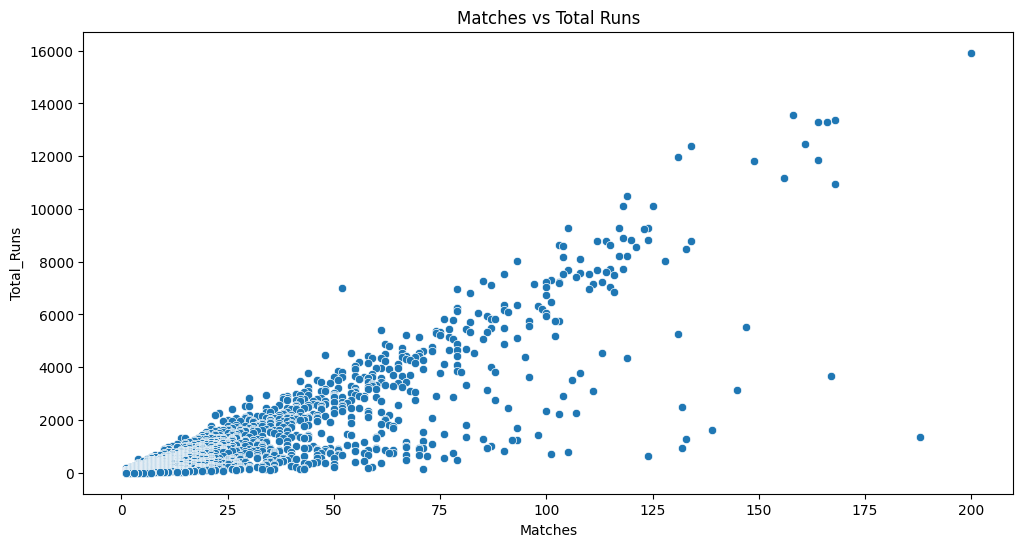

In [25]:
# Matches vs Total Runs
plt.figure(figsize=(12,6))
sns.scatterplot(x='Matches', y='Total_Runs', data=Test_df)
plt.title("Matches vs Total Runs")
plt.savefig("Matches vs Total Runs.png")
plt.show()

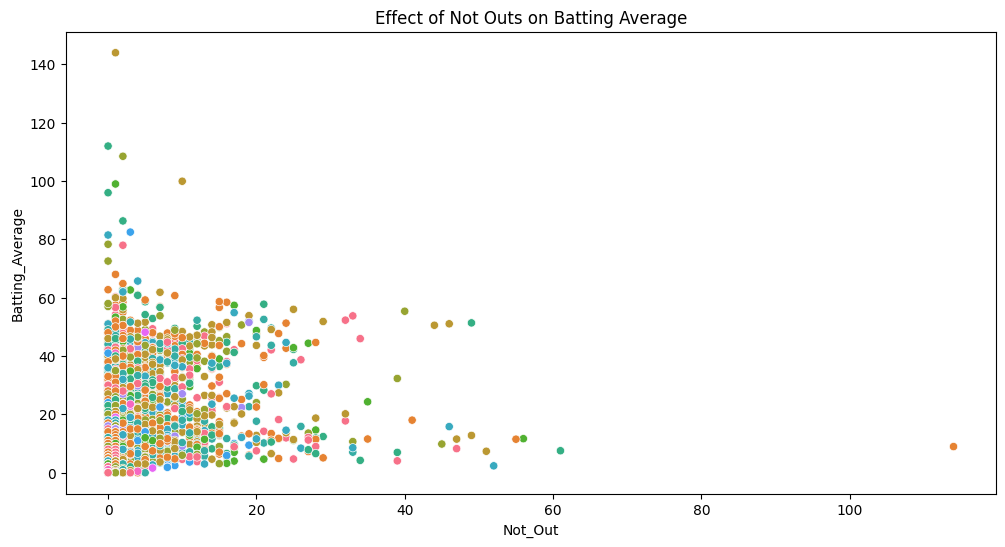

In [26]:
# Not Out vs Batting Average
plt.figure(figsize=(12,6))
sns.scatterplot(x='Not_Out', y='Batting_Average', data=Test_df, hue='Country', legend=False)
plt.title("Effect of Not Outs on Batting Average")
plt.savefig("Effect of Not Outs on Batting Average.png")
plt.show()

In [27]:
Test_df.loc[Test_df['Not_Out'] == Test_df['Not_Out'].max()]


,Player_Names,Country,Start_Year,End_Year,Matches,Innings,Not_Out,Total_Runs,Highest_Score,Batting_Average,100's,50's,0,Career_Span,HS_num
465,JM Anderson,England,2003,2024,188,265,114,1353,81,8.96,0,1,34,21,81


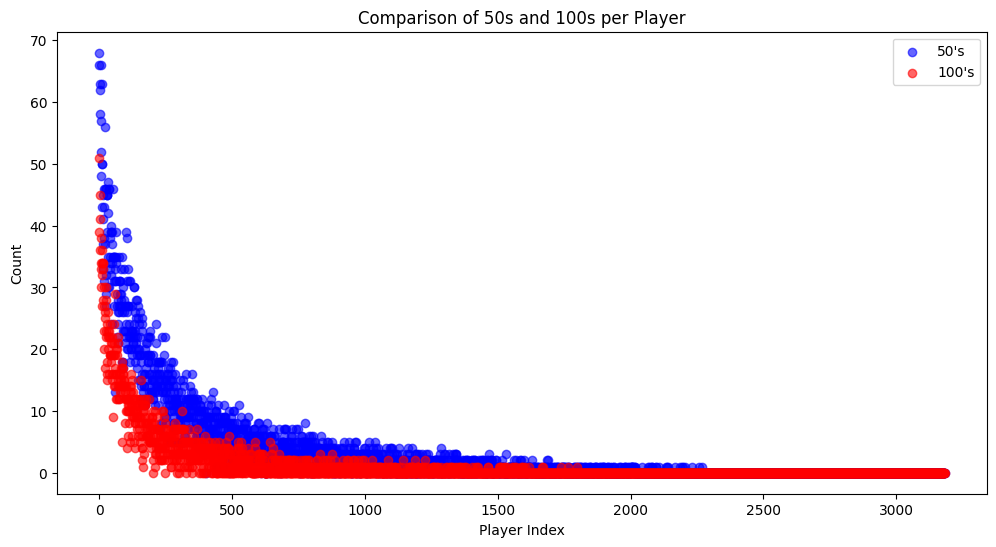

In [28]:
plt.figure(figsize=(12,6))

plt.scatter(Test_df.index, Test_df["50's"], color='blue', label="50's", alpha=0.6)
plt.scatter(Test_df.index, Test_df["100's"], color='red', label="100's", alpha=0.6)

plt.title("Comparison of 50s and 100s per Player")
plt.xlabel("Player Index")
plt.ylabel("Count")
plt.legend()
plt.savefig("Comparison of 50s and 100s per Player.png")
plt.show()


In [29]:
# avg_by_country = Test_df.groupby("Country")[["50's", "100's"]].sum().sort_values("50's", ascending=False).head(10)

# avg_by_country.plot(kind='bar', figsize=(10,6), color=['skyblue', 'salmon'])
# plt.title("Average 50s vs 100s by Country (Top 10)")
# plt.xlabel("Country")
# plt.ylabel("Average Count")
# plt.legend(["50's", "100's"])
# plt.tight_layout()
# plt.show()


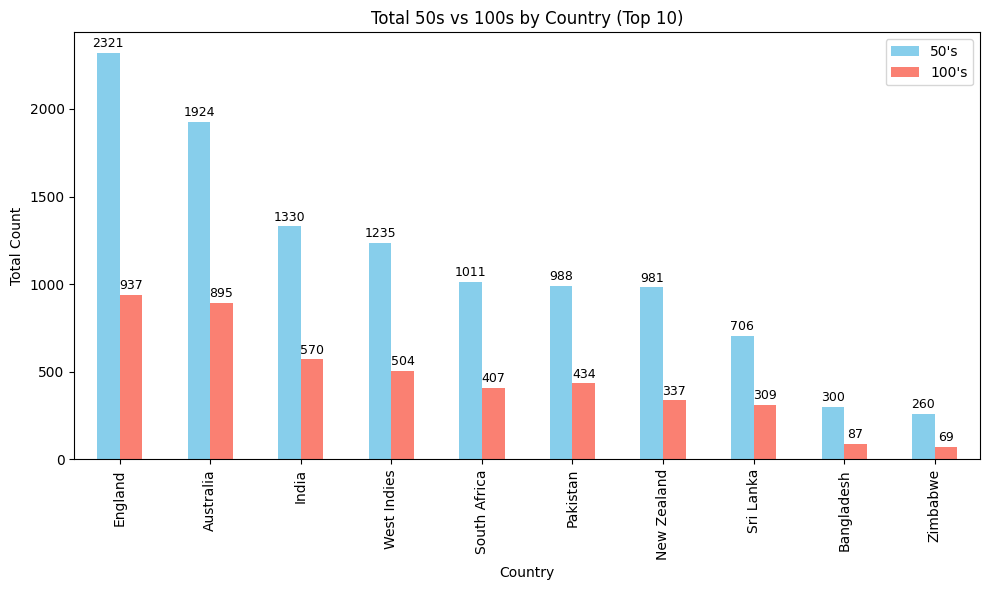

In [30]:
import matplotlib.pyplot as plt

# 🔹 Group by country and take total
totals_by_country = (
    Test_df.groupby("Country")[["50's", "100's"]]
    .sum()
    .sort_values("50's", ascending=False)
    .head(10)
)

# 🔹 Plot
ax = totals_by_country.plot(kind='bar', figsize=(10,6), color=['skyblue', 'salmon'])

plt.title("Total 50s vs 100s by Country (Top 10)")
plt.xlabel("Country")
plt.ylabel("Total Count")
plt.legend(["50's", "100's"])
plt.tight_layout()

# ✅ Add data labels on each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9, color='black', padding=2)
plt.savefig("Total 50s vs 100s by Country (Top 10).png")
plt.show()


In [31]:
# Test_df['Country'].unique()

In [32]:
# Test_df.groupby('Country')["100's"].sum()
# country_centuries = Test_df.groupby('Country')["100's"].sum().reset_index()
# country_centuries

In [33]:
# Test_df.groupby('Country')["50's"].sum()
# country_centuries = Test_df.groupby('Country')["50's"].sum().reset_index()
# country_centuries 

In [34]:
# Test_df.loc[Test_df['Country'] == 'Australia/South Africa']


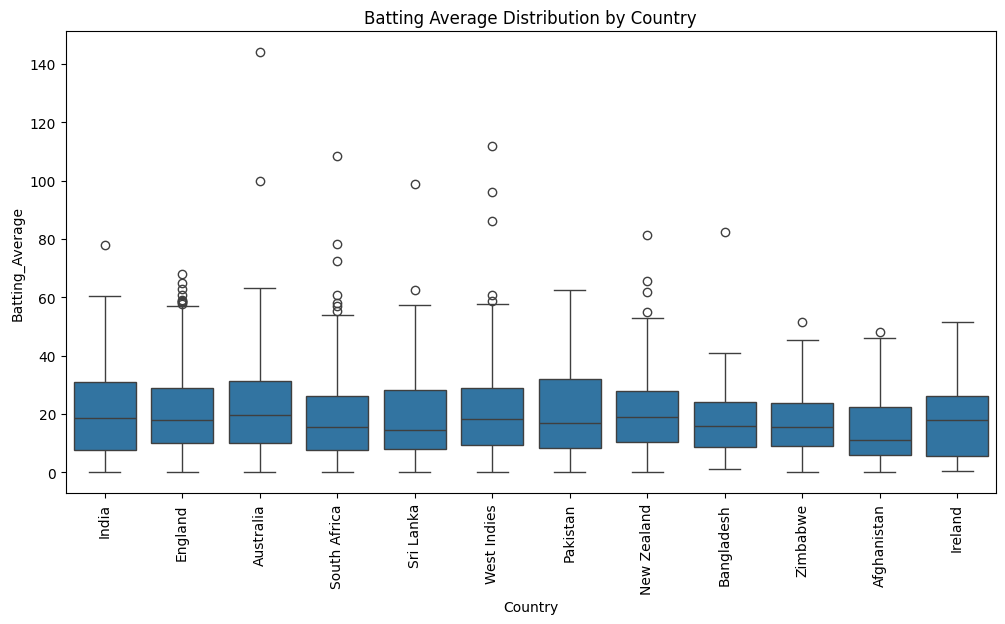

In [35]:
# Country vs Average
plt.figure(figsize=(12,6))
sns.boxplot(x='Country', y='Batting_Average', data=Test_df)
plt.title("Batting Average Distribution by Country")
plt.xticks(rotation=90)
plt.savefig("Batting Average Distribution by Country.png")
plt.show()

In [36]:
Test_df[Test_df['Country']=='IND/PAK']

,Player_Names,Country,Start_Year,End_Year,Matches,Innings,Not_Out,Total_Runs,Highest_Score,Batting_Average,100's,50's,0,Career_Span,HS_num


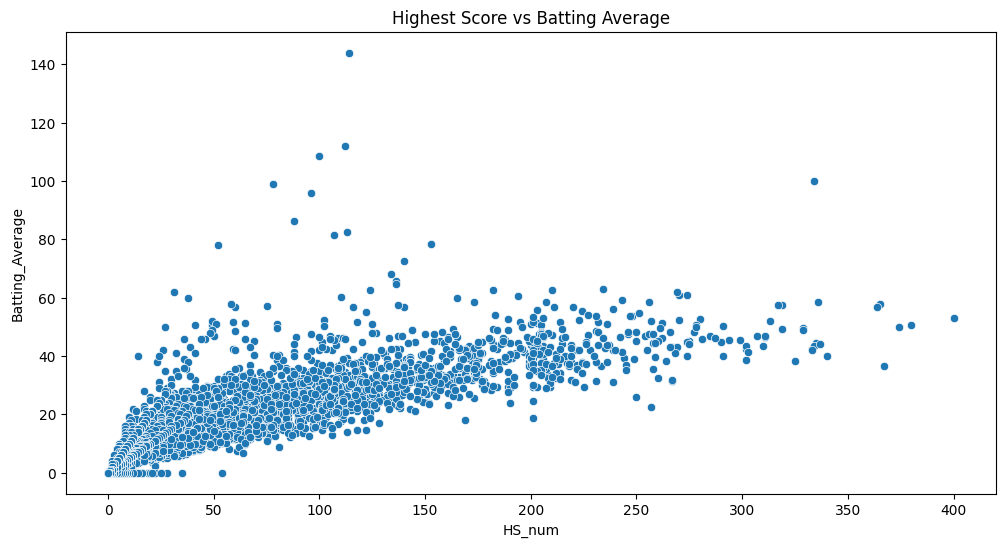

In [37]:
# HS_num vs Average
plt.figure(figsize=(12,6))
sns.scatterplot(x='HS_num', y='Batting_Average', data=Test_df)
plt.title("Highest Score vs Batting Average")
plt.savefig("Highest Score vs Batting Average.png")
plt.show()

In [38]:
Test_df.loc[Test_df['Batting_Average'] == Test_df['Batting_Average'].max()]


,Player_Names,Country,Start_Year,End_Year,Matches,Innings,Not_Out,Total_Runs,Highest_Score,Batting_Average,100's,50's,0,Career_Span,HS_num
1668,KR Patterson,Australia,2019,2019,2,2,1,144,114*,144.0,1,0,0,0,114


MULTIVARIATE ANALYSIS

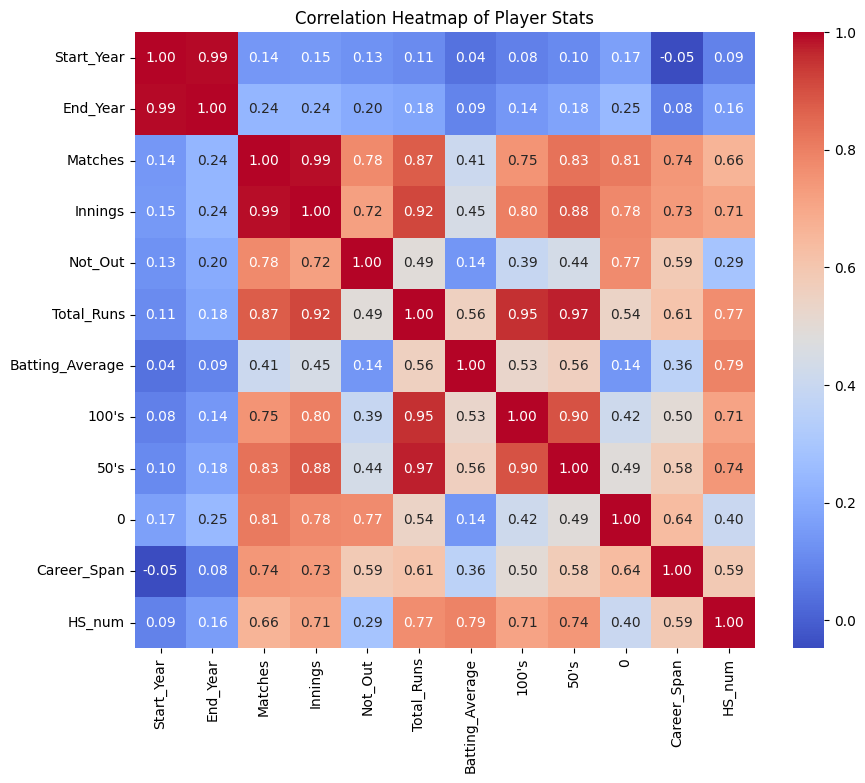

In [39]:
# Correlation heatmap
plt.figure(figsize=(10,8))
numeric_df = Test_df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Player Stats")
plt.savefig("Correlation Heatmap of Player Stats.png")
plt.show()

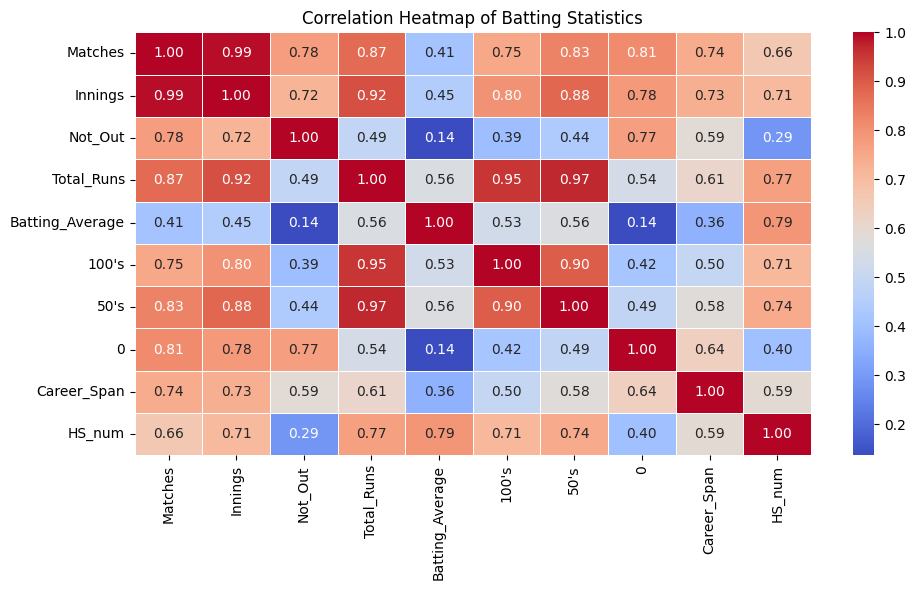

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns, excluding Start_Year and End_Year
numeric_df = Test_df.select_dtypes(include=['number']).drop(columns=['Start_Year', 'End_Year'], errors='ignore')

# Compute correlation matrix
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title("Correlation Heatmap of Batting Statistics")
plt.tight_layout()
plt.savefig("Correlation Heatmap of Player Stats.png")

plt.show()


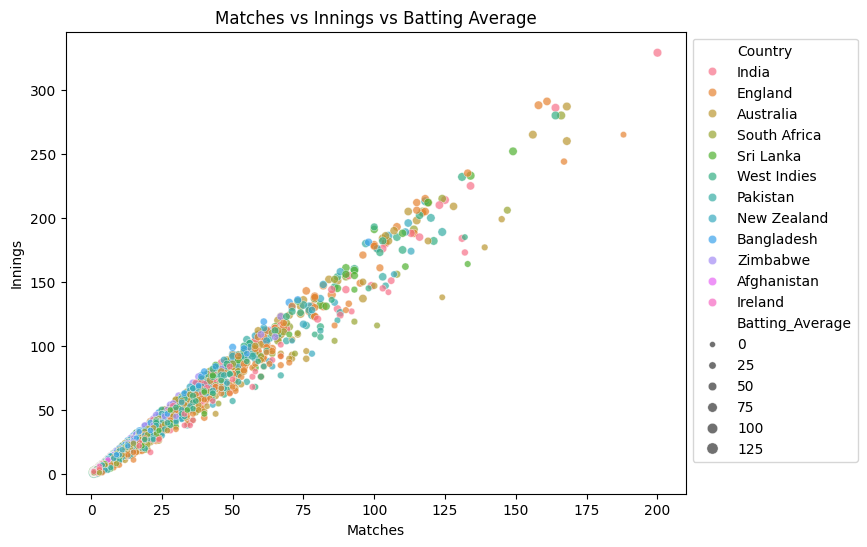

In [41]:
# Matches, Innings, Batting Average - 3D relationship (2D heatmap)
plt.figure(figsize=(8,6))
sns.scatterplot(x='Matches', y='Innings', size='Batting_Average', hue='Country', data=Test_df, alpha=0.7)
plt.title("Matches vs Innings vs Batting Average")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [42]:
Test_df

,Player_Names,Country,Start_Year,End_Year,Matches,Innings,Not_Out,Total_Runs,Highest_Score,Batting_Average,100's,50's,0,Career_Span,HS_num
0,SR Tendulkar,India,1989,2013,200,329,33,15921,248*,53.78,51,68,14,24,248
1,JE Root,England,2012,2025,158,288,24,13543,262,51.29,39,66,13,13,262
2,RT Ponting,Australia,1995,2012,168,287,29,13378,257,51.85,41,62,17,17,257
3,JH Kallis,South Africa,1995,2013,166,280,40,13289,224,55.37,45,58,16,18,224
4,R Dravid,India,1996,2012,164,286,32,13288,270,52.31,36,63,8,16,270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3178,Mukesh Kumar,India,2023,2024,3,4,3,0,0*,0.00,0,0,1,1,0
3179,Nadeem Ghauri,Pakistan,1990,1990,1,1,0,0,0,0.00,0,0,1,0,0
3180,M Ngam,South Africa,2000,2001,3,1,1,0,0*,0.00,0,0,0,1,0
3181,RL Park,Australia,1920,1921,1,1,0,0,0,0.00,0,0,1,1,0


In [43]:
Test_df.to_csv(r'C:\Users\anura\OneDrive\Desktop\webscrapping\Project\FINAL_data.csv', index=False)  


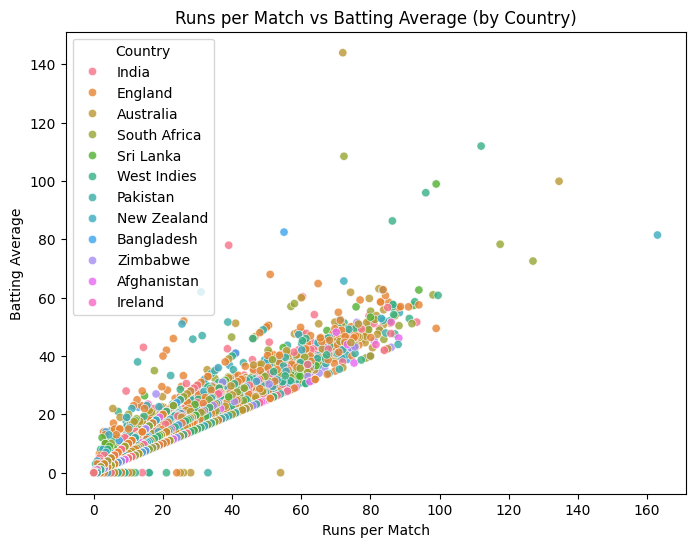

In [44]:

Test_df['Runs_per_Match'] = Test_df['Total_Runs'] / Test_df['Matches']

plt.figure(figsize=(8,6))
sns.scatterplot(x='Runs_per_Match', y='Batting_Average', hue='Country', data=Test_df, alpha=0.8)
plt.title("Runs per Match vs Batting Average (by Country)")
plt.xlabel("Runs per Match")
plt.ylabel("Batting Average")
plt.show()


C:\Users\anura\AppData\Local\Temp\ipykernel_13024\2879710487.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Country', y='Total_Runs', data=Test_df, estimator=sum, ci=None)


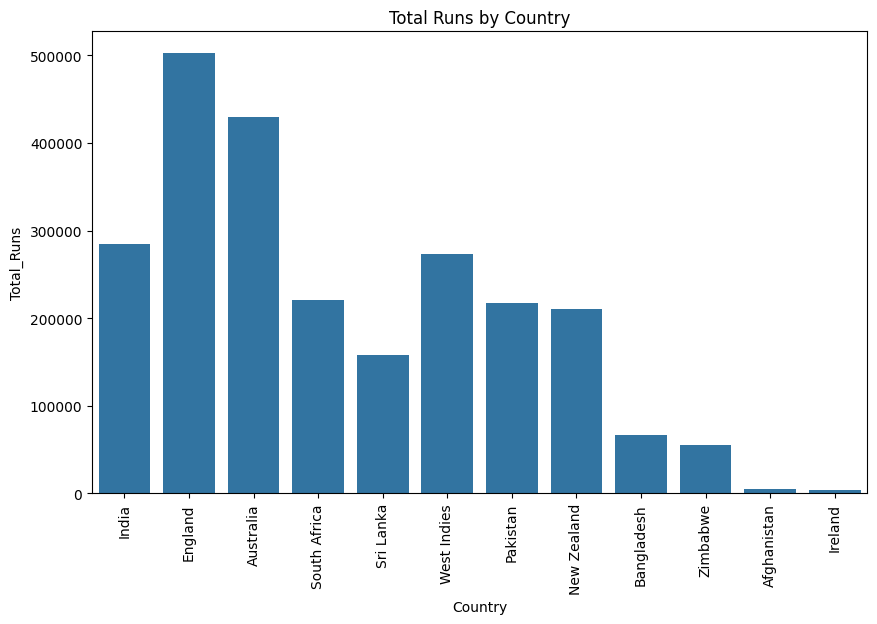

In [45]:
# Country vs Runs and Average
plt.figure(figsize=(10,6))
sns.barplot(x='Country', y='Total_Runs', data=Test_df, estimator=sum, ci=None)
plt.title("Total Runs by Country")
plt.xticks(rotation=90)
plt.savefig("Total Runs by Country.png")
plt.show()

In [46]:
# Top 5 averages by country
avg_by_country = Test_df.groupby('Country')['Batting_Average'].mean().sort_values(ascending=False).head(10)
print("\nTop 10 Countries by Average Batting Average:\n", avg_by_country)


Top 10 Countries by Average Batting Average:
 Country
Australia       21.862555
West Indies     20.694206
England         20.516037
Pakistan        20.492143
India           20.402573
New Zealand     20.090561
Sri Lanka       18.948706
South Africa    18.514740
Ireland         18.256296
Zimbabwe        17.448881
Name: Batting_Average, dtype: float64


C:\Users\anura\AppData\Local\Temp\ipykernel_13024\2418371645.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  era_avg = Test_df.groupby('Era')['Batting_Average'].mean()


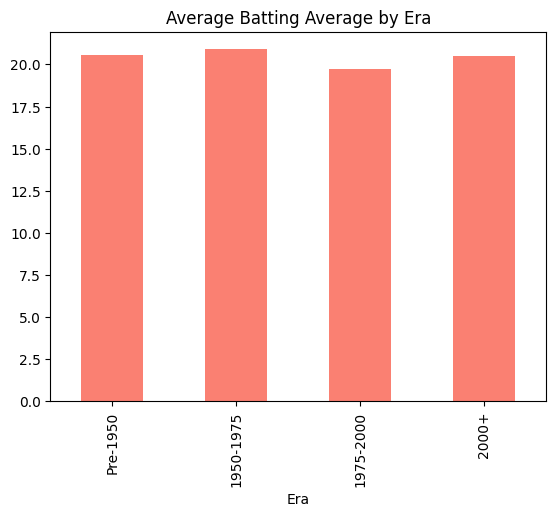

In [47]:
# Average Runs per Era
Test_df['Era'] = pd.cut(Test_df['Start_Year'], bins=[1900, 1950, 1975, 2000, 2025], labels=['Pre-1950', '1950-1975', '1975-2000', '2000+'])
era_avg = Test_df.groupby('Era')['Batting_Average'].mean()
era_avg.plot(kind='bar', color='salmon', title="Average Batting Average by Era")
plt.show()